In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('arq.csv')
df.info()
df = df[['COMPETEN','CODUFMUN','QT_EXIST','QT_SUS']]
df2 = df.groupby(['COMPETEN'])[['QT_SUS','QT_EXIST']].sum()
X_axis = np.arange(len(df))
QT_SUS = df2['QT_SUS'].tolist()
QT_EXIST = df2['QT_EXIST'].tolist()
X = df2.index.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266040 entries, 0 to 266039
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  266040 non-null  int64  
 1   CNES        266040 non-null  int64  
 2   CODUFMUN    266040 non-null  int64  
 3   REGSAUDE    162976 non-null  object 
 4   MICR_REG    14170 non-null   object 
 5   DISTRSAN    0 non-null       float64
 6   DISTRADM    2816 non-null    object 
 7   TPGESTAO    266040 non-null  object 
 8   PF_PJ       266040 non-null  int64  
 9   CPF_CNPJ    266040 non-null  int64  
 10  NIV_DEP     266040 non-null  int64  
 11  CNPJ_MAN    266040 non-null  int64  
 12  ESFERA_A    0 non-null       float64
 13  ATIVIDAD    266040 non-null  int64  
 14  RETENCAO    0 non-null       float64
 15  NATUREZA    0 non-null       float64
 16  CLIENTEL    264589 non-null  float64
 17  TP_UNID     266040 non-null  int64  
 18  TURNO_AT    266040 non-null  int64  
 19  NI

In [166]:
QT_SUS = QT_SUS[:45]
QT_EXIST = QT_EXIST[:45]
X_axis= np.arange(start=0, stop=90, step=2)
X = X[:45]

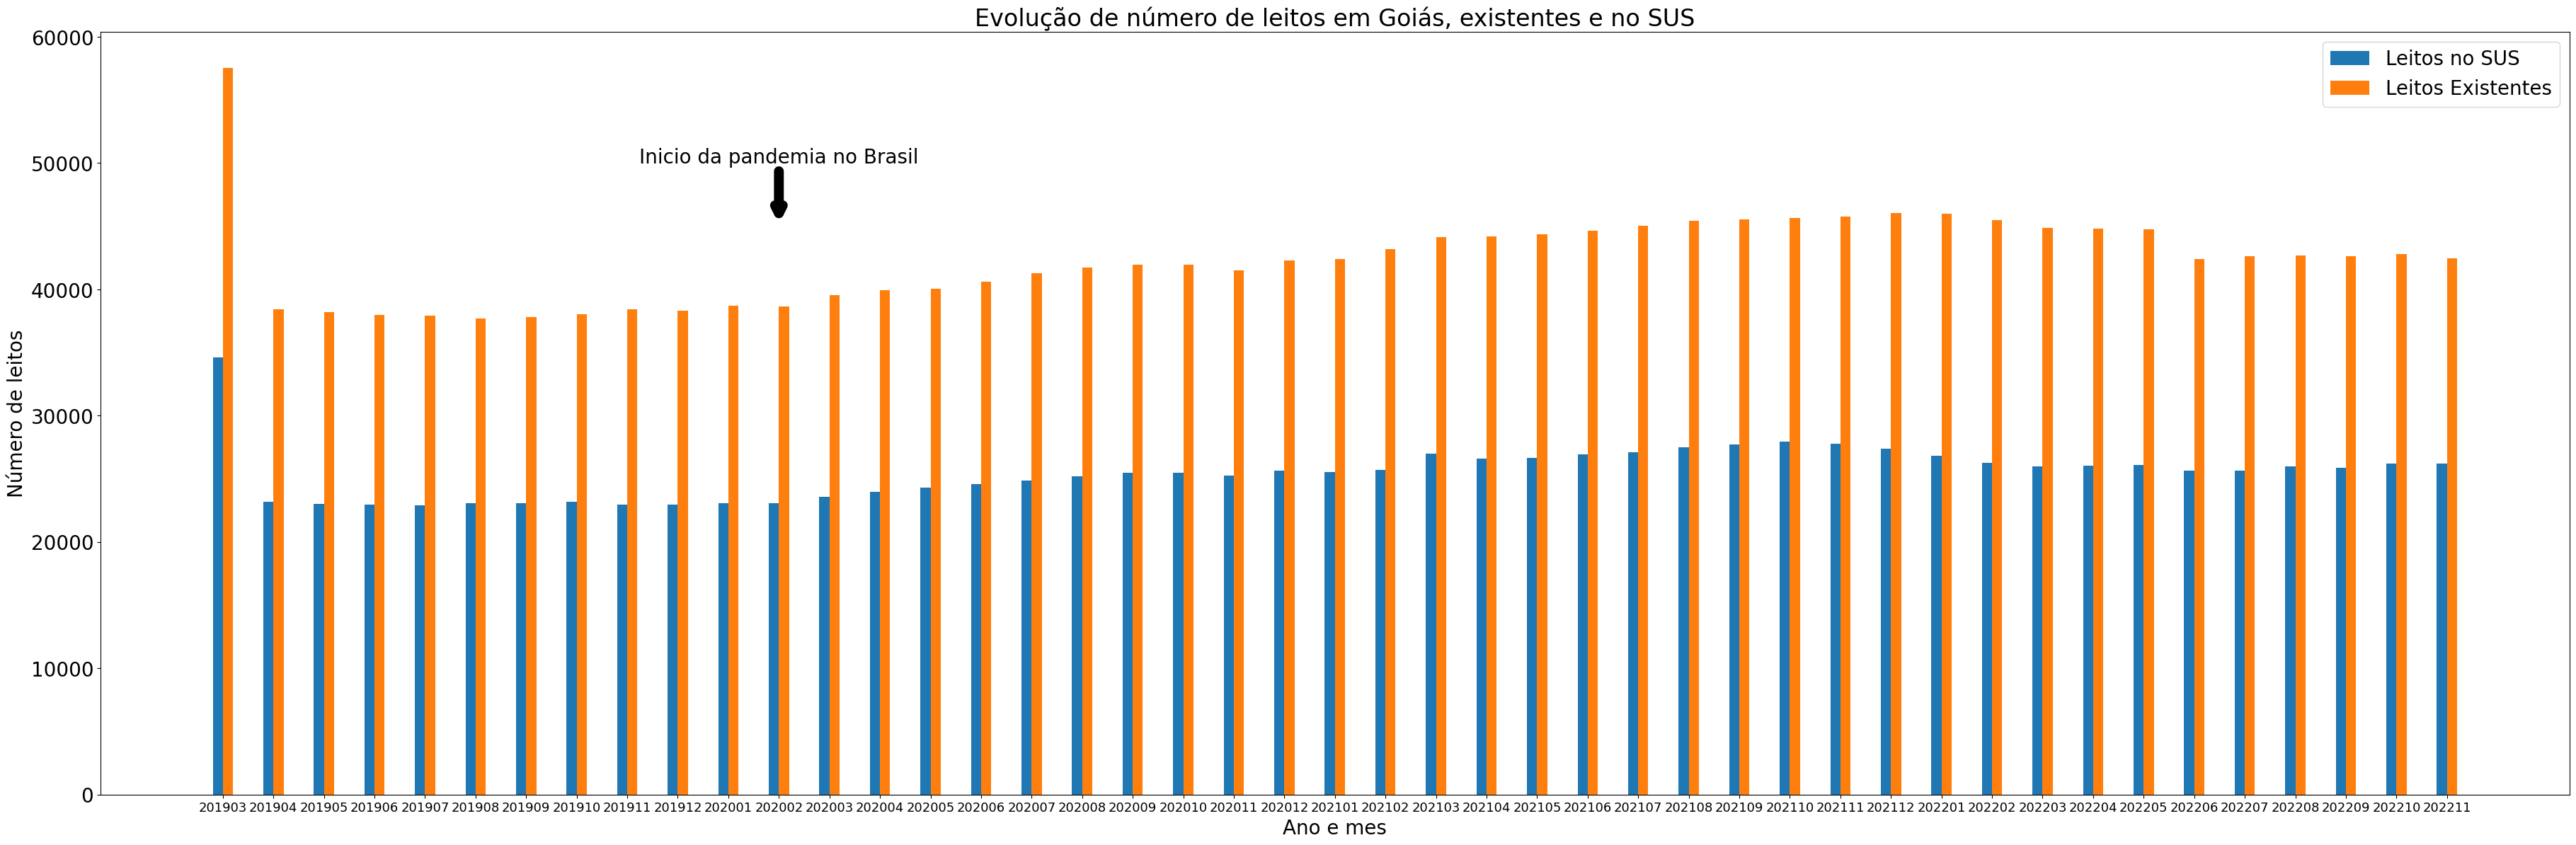

In [167]:
plt.figure(figsize=(45,14))
plt.rcParams.update({'font.size': 20})
plt.bar(X_axis - 0.2, QT_SUS, 0.4, label = 'Leitos no SUS',align='center')
plt.bar(X_axis + 0.2, QT_EXIST , 0.4, label = 'Leitos Existentes',align='center')
plt.xticks(X_axis, X)
plt.xticks(fontsize=13)
plt.xlabel("Ano e mes")
plt.ylabel("Número de leitos")
plt.title("Evolução de número de leitos em Goiás, existentes e no SUS")
plt.legend()
plt.annotate('Inicio da pandemia no Brasil', xy=(22, 45000),xytext=(22, 50000) ,horizontalalignment="center",
arrowprops=dict(arrowstyle="->",lw=10)
)
plt.show()


Verifica-se um aumento no número de leitos a partir do início da pandemia e uma diminuição na metade de 2022.

In [168]:
df3 = df.groupby(['COMPETEN','CODUFMUN']).agg({'QT_EXIST':sum,'QT_SUS':sum})
df3.reset_index().pivot('COMPETEN','CODUFMUN','QT_EXIST').tail(1).apply(pd.Series.nlargest, axis=1, n=3)

CODUFMUN,520870,520140,520110
COMPETEN,,,
202211,16550.0,2804.0,2526.0


In [169]:
cols = df3.reset_index().pivot('COMPETEN','CODUFMUN','QT_EXIST').tail(1).apply(pd.Series.nlargest, axis=1, n=3).columns.tolist()

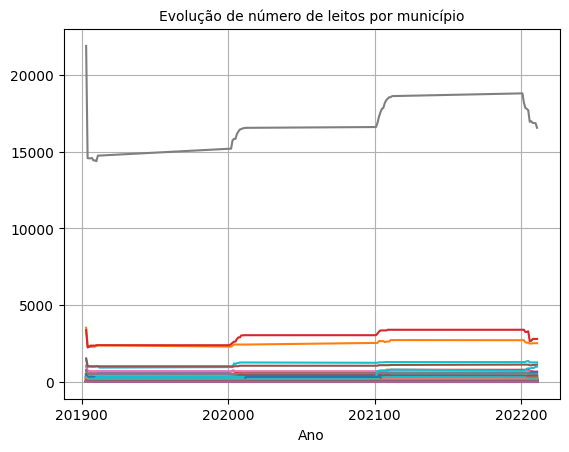

In [170]:
axes=df3.reset_index().pivot('COMPETEN','CODUFMUN','QT_EXIST').plot(title='Evolução de número de leitos por município', grid=True,legend=False,xlabel='Ano', fontsize=10)
axes.title.set_size(10)
plt.xlabel('Ano', fontsize=10);

Três municípios de Goiás têm a maior quantidade de leitos,e os outros possuem número menor.
Verifica-se um aumento no número de leitos existentes no início de 2020,que foi quando a pandemia começou. Também se observa esse aumento no início de 2021,talvez devido às festas do final de 2020. No ínício de 2022 observa-se um declínio no número de leitos existentes nestes 3 municípios com maior quantidade,sendo que nos outros a quantidade parece estável.

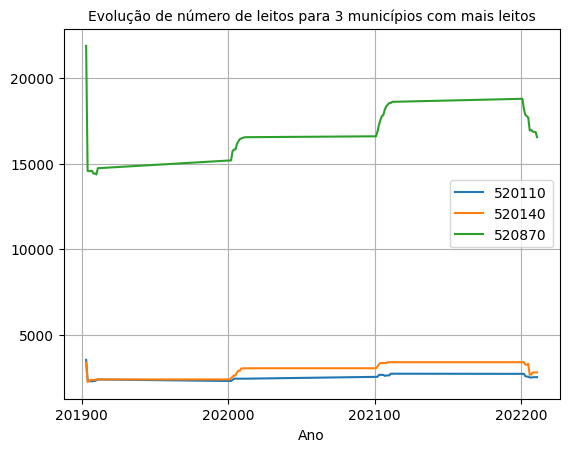

In [171]:
axes=df3[df3.index.get_level_values(1).isin(cols)].reset_index().pivot('COMPETEN','CODUFMUN','QT_EXIST').plot(title='Evolução de número de leitos para 3 municípios com mais leitos', grid=True,xlabel='Ano', fontsize=10)
axes.title.set_size(10)
plt.xlabel('Ano', fontsize=10)
plt.legend(fontsize=10);

In [172]:
df3['total'] = df3.groupby(level=0).QT_EXIST.transform('sum')

In [173]:
df3['perc'] = 100*df3['QT_EXIST']/df3['total']

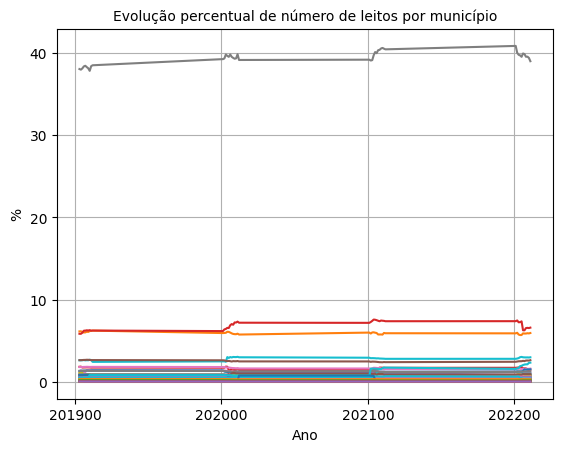

In [174]:
axes=df3.reset_index().pivot('COMPETEN','CODUFMUN','perc').plot(title='Evolução percentual de número de leitos por município', grid=True,legend=False,xlabel='Ano', fontsize=10)
axes.title.set_size(10)
plt.xlabel('Ano', fontsize=10)
plt.ylabel('%', fontsize=10);

O municipio de código 520870 concentra aproximadamente 40% dos leitos do estado